<a href="https://colab.research.google.com/github/nasnah-hansan/Pandas/blob/main/Pandas_practice_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 과제 1: 데이터 로드 및 초기 탐색 (정제 준비)

- 데이터 로드 및 확인: CSV 파일을 DataFrame으로 로드하고, 처음 5개 행을 확인하세요.

- 구조 파악: info() 메서드를 사용하여 전체 행 수, 결측치가 있는 열, 그리고 각 열의 데이터 타입 (dtype)을 확인하고 정리하세요.

- 통계 요약: describe() 메서드를 사용하여 숫자형 열의 최소값, 최대값, 평균, 표준편차 등을 빠르게 확인하고 이상치를 대략적으로 파악하세요.

🚀 과제 2: 결측치 및 오류 처리 (정제)

- 결측치 확인: 각 열의 결측치 개수와 비율을 계산하세요. (isnull().sum() / len(df) * 100)

- 결측치 처리 전략:

    > 비율이 높은 열: 결측치 비율이 50%를 초과하는 열이 있다면, 해당 열을 DataFrame에서 제거하세요. (dropna(axis=1))

    > 중요 열: 핵심 분석에 필요한 열 (예: 가격, 수량)에 결측치가 있다면, 평균 또는 중앙값으로 대체하세요. (fillna())

    > 범주형 열: 범주형 열의 결측치는 'Unknown' 또는 최빈값으로 대체하세요.

🚀 과제 3: 데이터 변환 및 파생 변수 생성 (변환)

- 타입 변환: 날짜/시간 정보를 포함하는 열이 있다면, pd.to_datetime()을 사용하여 datetime 타입으로 정확히 변환하세요.

- 파생 변수 생성: 분석에 유용한 새로운 열을 만드세요. 예를 들어, '구매 금액'과 '할인율'이 있다면 '실제 지불액' 열을 계산하여 추가하세요. (힌트: 벡터화 연산 활용)

🚀 과제 4: 그룹화 및 집계 분석 (분석)

- 핵심 지표 산출: 특정 범주형 열 (예: '국가', '제품 카테고리')을 기준으로 **groupby()**를 사용하여 다음을 수행하세요.

- 그룹별 평균, 합계, 개수를 동시에 계산하세요. (agg() 활용)

- 가장 거래액이 높은 상위 5개 그룹을 찾으세요. (sort_values() 활용)

🚀 과제 5: 데이터 선택 및 조건부 처리 (숙련도)

- 복합 조건 필터링: loc[] 또는 부울 마스킹을 사용하여 '가격이 100 이상' 이면서 '지역이 서울'인 데이터만 추출하세요.
- 조건부 값 변경: 특정 조건 (예: '나이'가 60세 이상)을 만족하는 행의 '등급' 열 값을 'Gold'에서 **'VIP'**로 변경하세요.


In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import os

In [2]:
# 폴더에 있는 파일명 가져오기
file_names = os.listdir('/content/drive/MyDrive/Colab Notebooks/Ecommerce Order Dataset/train')

variable_names = []
for name in file_names:
  variable_names.append(name[:-4])
print(variable_names)
# 두개의 문자 사이를 자르는 것은 좀 더 복잡한 것 같음
# for name in file_names:
#   variable_names.append(name.split('_'))

['df_OrderItems', 'df_Customers', 'df_Orders', 'df_Payments', 'df_Products']


In [3]:


for i in variable_names:
  globals()['{}'.format(i)] = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce Order Dataset/train/{}.csv'.format(i))
  # unique는 중복되지 않는 data의 갯수
  print("{}".format(i))
  print("+++++++++++++++++++++++++++++++++++++")
  print(globals()['{}'.format(i)].info())
  print("+++++++++++++++++++++++++++++++++++++")
  print(globals()['{}'.format(i)].describe(include='all'))
  print("-------------------------------------")

df_OrderItems
+++++++++++++++++++++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB
None
+++++++++++++++++++++++++++++++++++++
            order_id    product_id     seller_id         price  \
count          89316         89316         89316  89316.000000   
unique         89316         27451          2929           NaN   
top     Xo1fqyXOC6CR  0vbEvli2JYJu  RKad98cTxhSb           NaN   
freq               1           405          1657           NaN   
mean             NaN           NaN           NaN    340.900543   
std              NaN

In [4]:
# df_Orders에 결측률이 2% 이상인 열을 삭제한다. (원래는 숫자가 높을수록 열을 제거한다)
drop_rate = 0.02
print((1-drop_rate)*len(df_Orders))
df_Orders.dropna(axis=1, thresh=(1-drop_rate)*len(df_Orders))

87529.68


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-18
...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-17


In [5]:
# 시각화를 해도 이해할 수 없었다. order_state와 delivery time stamp관계를 파악해야겠다
# 'order_status'로 그룹화하여 'order_delivered_timestamp'의 결측치 개수 확인
missing_by_status = df_Orders.groupby('order_status')['order_delivered_timestamp'].apply(lambda x: x.isnull().sum())
print(missing_by_status)
# 전체 데이터 대비 비율(%) 계산
total_by_status = df_Orders['order_status'].value_counts()
print(total_by_status)
missing_ratio = (missing_by_status / total_by_status * 100).sort_values(ascending=False)

# 결과 합치기
status_analysis = pd.DataFrame({
    'Missing Count': missing_by_status,
    'Total Count': total_by_status,
    'Missing Ratio (%)': missing_ratio
})

print(status_analysis)

order_status
approved         2
canceled       404
delivered        6
invoiced       266
processing     273
shipped        936
unavailable      2
Name: order_delivered_timestamp, dtype: int64
order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64
              Missing Count  Total Count  Missing Ratio (%)
order_status                                               
approved                  2            2         100.000000
canceled                404          409          98.777506
delivered                 6        87428           0.006863
invoiced                266          266         100.000000
processing              273          273         100.000000
shipped                 936          936         100.000000
unavailable               2            2         100.000000


<Axes: >

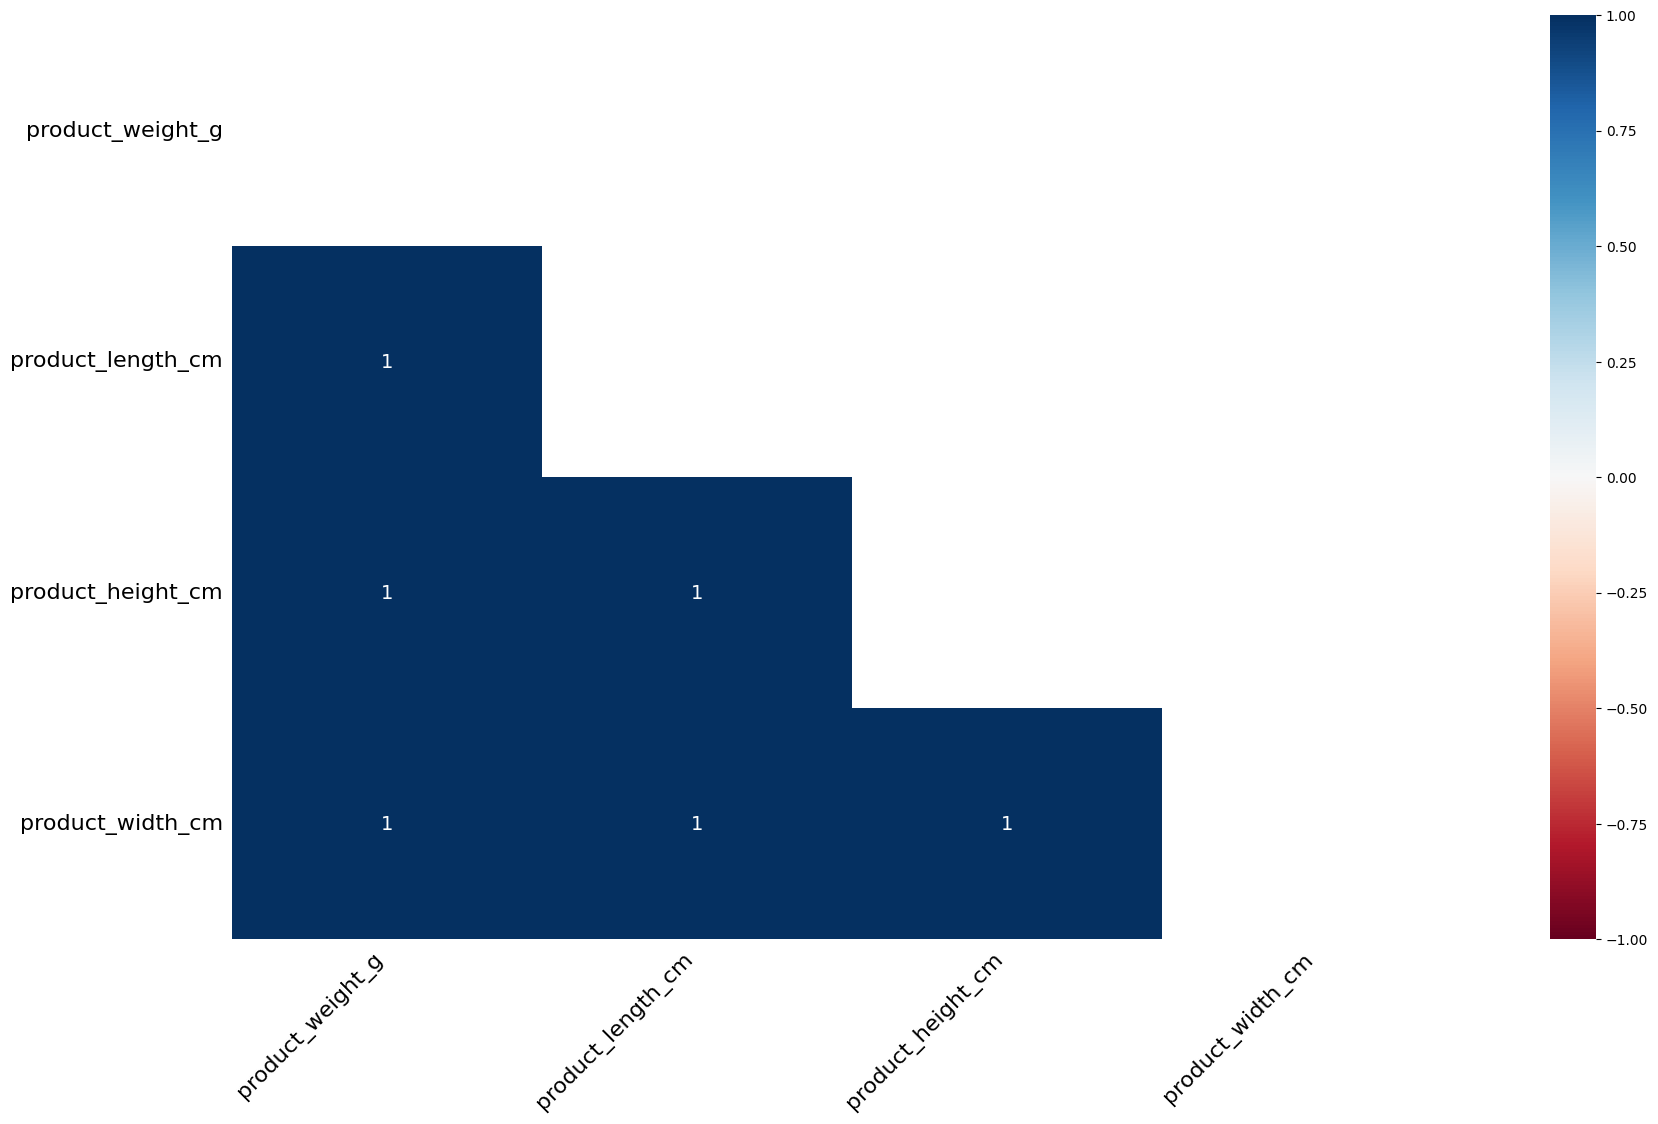

In [6]:
# Products에 결측치를 채워보자
# 우선 weight정보가 없는 행은 크기 정보도 없음을 확인한다.
# 이것을 "결츨 결합도"라고 한다.
# 1. 결측치 상관관계 히트맵 : 1에 가까울수록 "A가 결측이면 B도 결측이다"
import missingno as msno
spec_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
msno.heatmap(df_Products[spec_cols])

<Axes: >

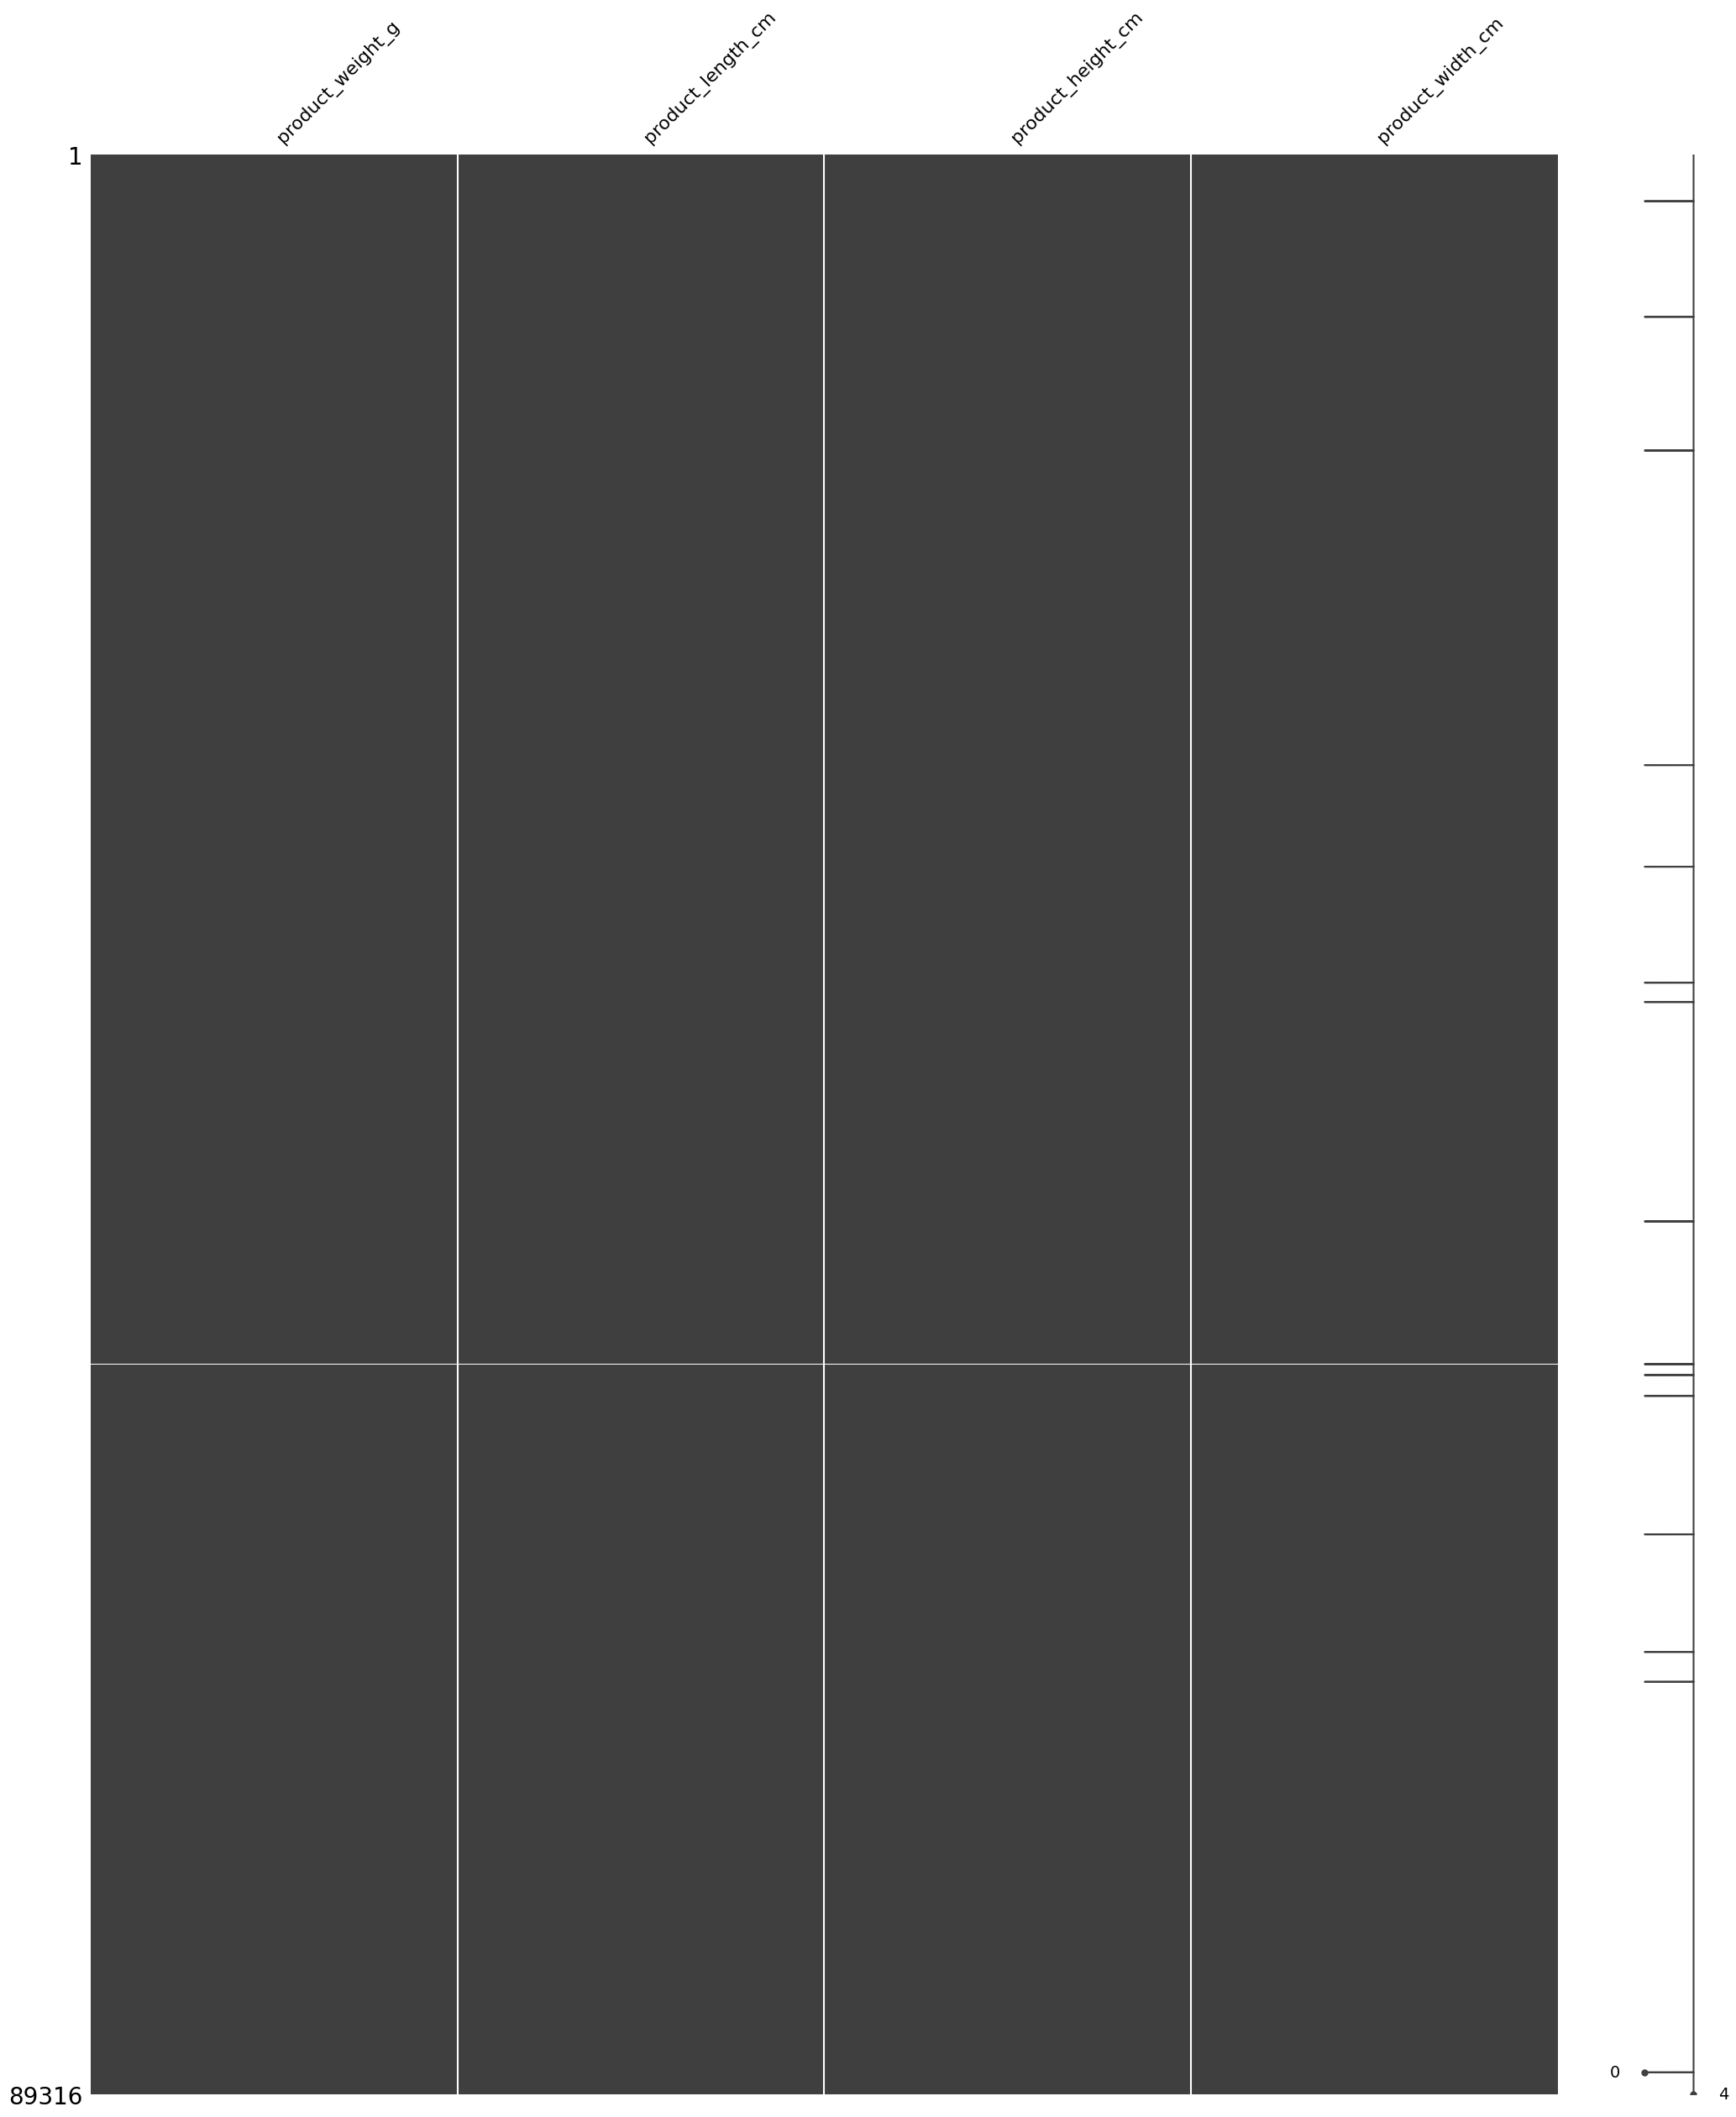

In [7]:
# 2. 결측치 메트릭스
msno.matrix(df_Products[spec_cols], figsize=(25,30))

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2150 to 88303
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             15 non-null     object 
 1   product_category_name  15 non-null     object 
 2   product_weight_g       0 non-null      float64
 3   product_length_cm      0 non-null      float64
 4   product_height_cm      0 non-null      float64
 5   product_width_cm       0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 840.0+ bytes
None
무게 정보가 없는 제품 중 크기 정보도 없는 비율: 100.0%


<Axes: >

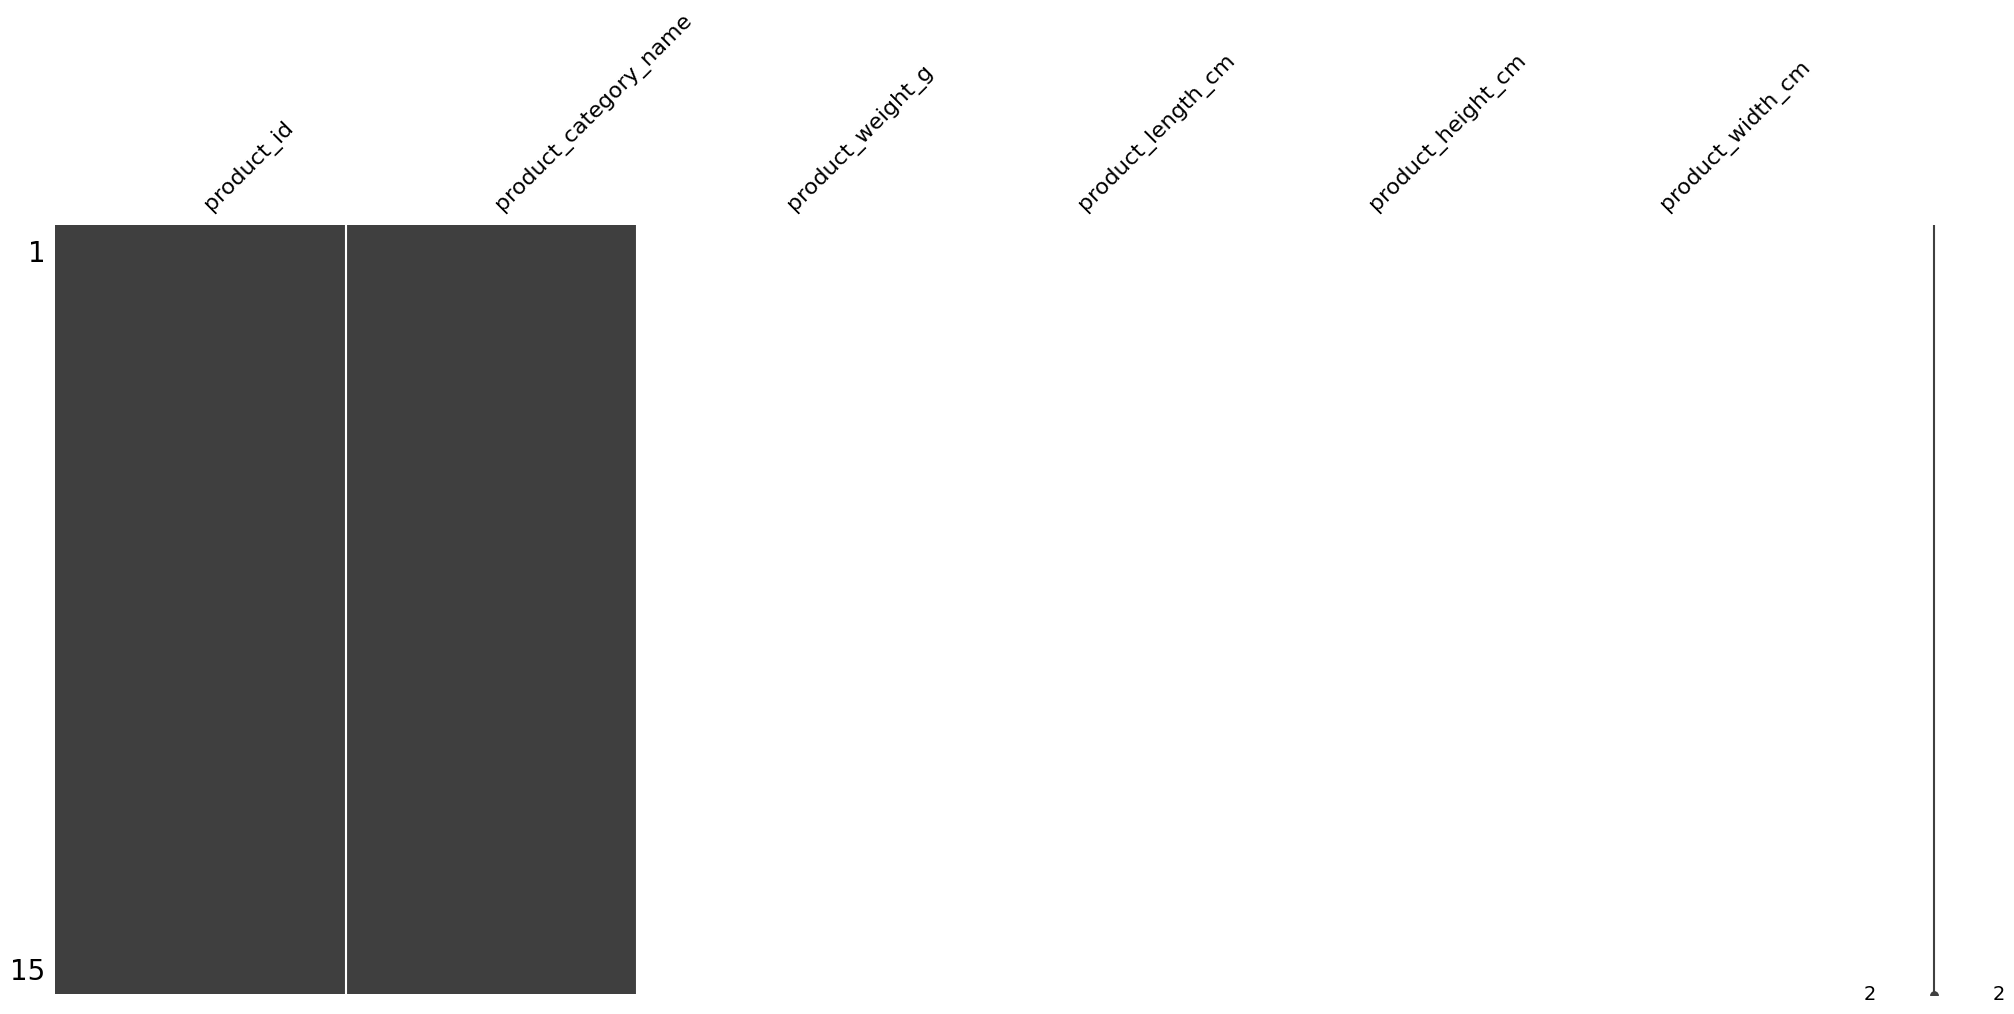

In [8]:
# 3. 조건부 카운트
# weight_missing = df_Products['product_weight_g'].isnull()
# print(weight_missing.info()) # 이것은 series
weight_missing = df_Products[df_Products['product_weight_g'].isnull()]
print(weight_missing.info()) # 이것은 dataframe
both_missing_ratio = weight_missing['product_length_cm'].isnull().mean() * 100
print(f"무게 정보가 없는 제품 중 크기 정보도 없는 비율: {both_missing_ratio}%")
# 하지만 갯수로만 파악하면 우연의 일치로 인한 오류도 있을 것 같다.
# matrix로 확인도 필요할 듯
msno.matrix(weight_missing)


In [9]:
# 크기에 대한 결측치를 가지고 있는 Product_id가 모두 결측치인지 아니면 크기에 대한 data가 있는지 확인
# product_weight_g가 결측치인 product_id 추출
weight_missing_id = weight_missing['product_id']
weight_missing_id_unique = weight_missing_id.unique()
# df_Prducts에서 해당 제품만 필터링
df_Products[df_Products['product_id'].isin(weight_missing_id_unique)]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2150,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
7473,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
13628,VqyFCmRtRdfR,toys,NaN,NaN,NaN,NaN
28114,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
32791,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
38130,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
39021,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
49124,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
55696,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
56195,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN


In [19]:
# df_OrderItem에서 missed product_id가 판메되었는지 찾아본다. 판매된적이 있다면 toy의 평균치로 치환
# 판매된적 없다면 삭제하는게 바람직한 것으로 판단한다.
df_OrderItems[df_OrderItems['product_id'].isin(weight_missing_id_unique)]

,order_id,product_id,seller_id,price,shipping_charges
2150,LLpfRBTIDAMu,zX9HL81jfvr2,SgeUigb5Vbiv,0.85,47.55
7473,Y9unXa7B00ds,zX9HL81jfvr2,SgeUigb5Vbiv,1899.00,55.54
13628,s0zgnysuVXZ7,VqyFCmRtRdfR,an4nnRfYSBxC,64.00,45.96
28114,rtmE9CDJyXUr,zX9HL81jfvr2,SgeUigb5Vbiv,1899.00,59.00
32791,96ExWBgnKi0b,zX9HL81jfvr2,SgeUigb5Vbiv,1899.00,70.34
38130,7hyinowt4dKN,zX9HL81jfvr2,SgeUigb5Vbiv,0.85,47.55
39021,bTU67v0dsjbM,zX9HL81jfvr2,SgeUigb5Vbiv,0.85,20.51
49124,NbAThF0CilBY,zX9HL81jfvr2,SgeUigb5Vbiv,1899.00,2.46
55696,ueIgIKGaHvN9,zX9HL81jfvr2,SgeUigb5Vbiv,0.85,47.55
56195,CpScrU2hRmJV,zX9HL81jfvr2,SgeUigb5Vbiv,1899.00,2.46


In [37]:
# VqyFCmRtRdfR 는 1회 판매되었기 때문에 삭제하고, zX9HL81jfvr2 은 toy의 평균치로 치환한다.
# 그전에 zX9HL81jfvr2이 전체 데이터에서 차지하는 비중을 참고로 확인한다.
# 그 과정으로 다시 dataframe에서 메서드 사용과 그 안에서 메서드 사용의 차이를 확인
# print(df_Products['product_id'].isin(weight_missing_id_unique))
# print(df_Products[df_Products['product_id'].isin(weight_missing_id_unique)])
# print(df_Products['product_id'].isin(weight_missing_id_unique).sum())
# 이하는 에러
# print(df_Products[df_Products['product_id'].isin(weight_missing_id_unique).sum()])


# 결측 자료를 index로 하고, 총갯수(product_id의), 결측갯수, 결측률
counts = df_Products['product_id'].value_counts()
print(counts)
print(counts.loc[weight_missing_id_unique])

product_id
0vbEvli2JYJu    405
9NwzO0Pm0fDM    383
UgkSjxoiV9Ev    383
SLTlrWtcYt1m    321
Biwi1BNtUB7l    295
               ... 
GUAgYIU0iRmx      1
5pbzE0rDy61l      1
hxSF3HobeNpy      1
2vl64eF7HeNU      1
kps4rx8sOhSX      1
Name: count, Length: 27451, dtype: int64
product_id
zX9HL81jfvr2    14
VqyFCmRtRdfR     1
Name: count, dtype: int64
